# Hierarchical Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation

In [30]:
df = pd.read_csv('alena.csv')


In [31]:
df


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,level CGPA
0,337,4.770685,4,4.5,4.5,2.266958,1,0.92,1
1,324,4.672829,4,4.0,4.5,2.182675,1,0.76,1
2,316,4.644391,3,3.0,3.5,2.079442,1,0.72,0
3,322,4.700480,3,3.5,2.5,2.159869,1,0.80,1
4,314,4.634729,2,2.0,3.0,2.105353,0,0.65,1
...,...,...,...,...,...,...,...,...,...
391,324,4.700480,3,3.5,3.5,2.201659,1,0.82,1
392,325,4.672829,3,3.0,3.5,2.209373,1,0.84,1
393,330,4.753590,4,5.0,4.5,2.246015,1,0.91,1
394,312,4.634729,3,3.5,4.0,2.172476,0,0.67,1


In [35]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['GRE Score', 'TOEFL Score', 'University Rating','SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit', 'level CGPA']).round()

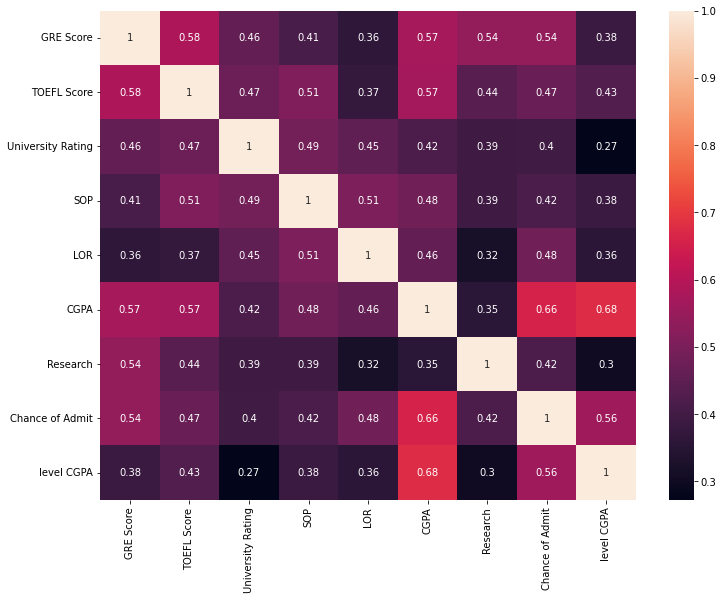

In [36]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

# Number of clusters

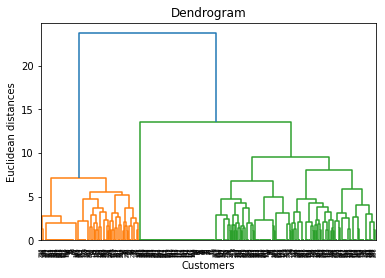

In [38]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Baseline model

In [39]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [40]:
hc

array([2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       2, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0,
       0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

# Feature Reduction

In [41]:
X = df.iloc[:, [1, 2, 8]]

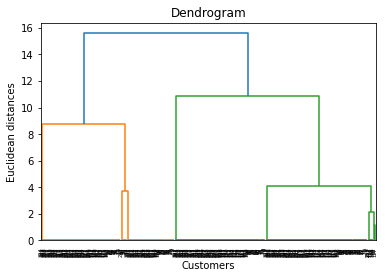

In [42]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Исходя из графика можно сказть что подходящее количество классов это 2

In [43]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

# Pickle results

In [44]:
import pickle
obj = {'hc': hc}
output = open('clust.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()